In [20]:
import pandas as pd
import csv as csv

data_raw = pd.read_csv("data/train.csv", header=0)
data_val   = pd.read_csv("data/test.csv", header=0)
data1 = data_raw.copy(deep = True)
data_cleaner = [data1, data_val]
print(data_raw.keys())
print(data_raw.info())
data_raw.sample(10)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 12 columns):
PassengerId    750 non-null int64
Survived       750 non-null int64
Pclass         750 non-null int64
Name           750 non-null object
Sex            750 non-null object
Age            591 non-null float64
SibSp          750 non-null int64
Parch          750 non-null int64
Ticket         750 non-null object
Fare           749 non-null float64
Cabin          148 non-null object
Embarked       749 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 55.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
438,439,1,3,"Olsson, Mr. Oscar Wilhelm",male,32.0,0,0,347079,7.7750,NaN,S
544,545,0,3,"Calic, Mr. Jovo",male,17.0,0,0,315093,8.6625,NaN,S
100,101,1,2,"Ware, Mrs. John James (Florence Louise Long)",female,31.0,0,0,CA 31352,21.0000,NaN,S
635,636,0,1,"Carrau, Mr. Jose Pedro",male,17.0,0,0,113059,47.1000,NaN,S
707,708,0,3,"Beavan, Mr. William Thomas",male,19.0,0,0,323951,8.0500,NaN,S
233,234,0,3,"Canavan, Mr. Patrick",male,21.0,0,0,364858,7.7500,NaN,Q
327,328,0,3,"Andersen, Mr. Albert Karvin",male,32.0,0,0,C 4001,22.5250,NaN,S
689,690,0,2,"Pernot, Mr. Rene",male,NaN,0,0,SC/PARIS 2131,15.0500,NaN,C
69,70,1,1,"Clark, Mrs. Walter Miller (Virginia McDowell)",female,26.0,1,0,13508,136.7792,C89,C
216,217,1,1,"Geiger, Miss. Amalie",female,35.0,0,0,113503,211.5000,C130,C


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

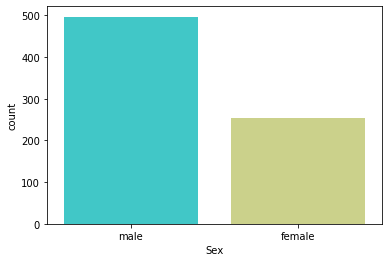

In [22]:
sns.countplot('Sex', data=train_df, palette='rainbow')

In [23]:
print('Train columns with null values:\n', data1.isnull().sum())
print("-"*10)

print('Test/Validation columns with null values:\n', data_val.isnull().sum())
print("-"*10)

Train columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            159
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          602
Embarked         1
dtype: int64
----------
Test/Validation columns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age            104
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          412
Embarked         1
dtype: int64
----------


In [24]:
for dataset in data_cleaner:    
    #中央値
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)

    #最頻値
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)

    #中央値
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)
    
#欠損データが多すぎるのと、明らかに不要なデータの削除
drop_column = ['PassengerId','Cabin', 'Ticket']
data1.drop(drop_column, axis=1, inplace = True)

print(data1.isnull().sum())
print("-"*10)
print(data_val.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
----------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          412
Embarked         0
dtype: int64


In [29]:
for dataset in data_cleaner:    
    #家族の数
    dataset['FamilySize'] = dataset ['SibSp'] + dataset['Parch'] + 1
    #一人かどうか
    dataset['IsAlone'] = 1 #初期値はすべて1（= Alone）
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0 # familiSizeが1より大きければ0

    #quick and dirty code split title from name: http://www.pythonforbeginners.com/dictionary/python-split
    dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]


    #qcut：指定した数だけデータを等分する（個数）
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)
    print(pd.qcut(dataset['Fare'], 4).value_counts())
    print("-"*10)
    
    #cut：指定した領域ごとにデータを分割する(等間隔)
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)


stat_min = 10 
title_names = (data1['Title'].value_counts() < stat_min) #this will create a true false series with title name as index

#apply and lambda functions are quick and dirty code to find and replace with fewer lines of code: https://community.modeanalytics.com/python/tutorial/pandas-groupby-and-python-lambda-functions/
data1['Title'] = data1['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
print(data1['Title'].value_counts())
print("-"*10)


#preview data again
data1.info()
data_val.info()
data1.sample(10)

(-0.001, 7.896]    195
(14.108, 30.0]     190
(30.0, 512.329]    184
(7.896, 14.108]    181
Name: Fare, dtype: int64
----------
(-0.001, 7.896]      142
(7.896, 14.5]        141
(36.877, 512.329]    140
(14.5, 36.877]       136
Name: Fare, dtype: int64
----------
Mr        438
Miss      140
Mrs       108
Master     40
Misc       24
Name: Title, dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 14 columns):
Survived      750 non-null int64
Pclass        750 non-null int64
Name          750 non-null object
Sex           750 non-null object
Age           750 non-null float64
SibSp         750 non-null int64
Parch         750 non-null int64
Fare          750 non-null float64
Embarked      750 non-null object
FamilySize    750 non-null int64
IsAlone       750 non-null int64
Title         750 non-null object
FareBin       750 non-null category
AgeBin        750 non-null category
dtypes: category(2), float64(2), int64(6), objec

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
595,0,3,"Karlsson, Mr. Julius Konrad Eugen",male,33.0,0,0,7.8542,S,1,1,Mr,"(-0.001, 7.896]","(32.0, 48.0]"
365,0,2,"Brown, Mr. Thomas William Solomon",male,60.0,1,1,39.0000,S,3,0,Mr,"(30.0, 512.329]","(48.0, 64.0]"
210,0,2,"Meyer, Mr. August",male,39.0,0,0,13.0000,S,1,1,Mr,"(7.896, 14.108]","(32.0, 48.0]"
64,0,3,"Holm, Mr. John Fredrik Alexander",male,43.0,0,0,6.4500,S,1,1,Mr,"(-0.001, 7.896]","(32.0, 48.0]"
510,1,3,"Lulic, Mr. Nikola",male,27.0,0,0,8.6625,S,1,1,Mr,"(7.896, 14.108]","(16.0, 32.0]"
276,0,2,"Chapman, Mrs. John Henry (Sara Elizabeth Lawry)",female,29.0,1,0,26.0000,S,2,0,Mrs,"(14.108, 30.0]","(16.0, 32.0]"
534,1,3,"Goldsmith, Master. Frank John William ""Frankie""",male,9.0,0,2,20.5250,S,3,0,Master,"(14.108, 30.0]","(-0.08, 16.0]"
247,0,3,"Lahoud, Mr. Sarkis",male,28.0,0,0,7.2250,C,1,1,Mr,"(-0.001, 7.896]","(16.0, 32.0]"
89,0,3,"Khalil, Mrs. Betros (Zahie ""Maria"" Elias)",female,28.0,1,0,14.4542,C,2,0,Mrs,"(14.108, 30.0]","(16.0, 32.0]"
729,0,2,"Bracken, Mr. James H",male,27.0,0,0,13.0000,S,1,1,Mr,"(7.896, 14.108]","(16.0, 32.0]"


In [47]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label = LabelEncoder()
for dataset in data_cleaner:    
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])


#define y variable aka target/outcome
Target = ['Survived']

#define x variables for original features aka feature selection
data1_x = ['Sex','Pclass', 'Embarked', 'Title','SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] #pretty name/values for charts
data1_x_calc = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code','SibSp', 'Parch', 'Age', 'Fare'] #coded for algorithm calculation
data1_xy =  Target + data1_x
print('Original X Y: ', data1_xy, '\n')


#define x variables for original w/bin features to remove continuous variables
data1_x_bin = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']
data1_xy_bin = Target + data1_x_bin
print('Bin X Y: ', data1_xy_bin, '\n')


#define x and y variables for dummy features original
data1_dummy = pd.get_dummies(data1[data1_x])
data1_x_dummy = data1_dummy.columns.tolist()
data1_xy_dummy = Target + data1_x_dummy
print('Dummy X Y: ', data1_xy_dummy, '\n')

data1_dummy.head()

Original X Y:  ['Survived', 'Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] 

Bin X Y:  ['Survived', 'Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code'] 

Dummy X Y:  ['Survived', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Misc', 'Title_Miss', 'Title_Mr', 'Title_Mrs'] 



,Pclass,SibSp,Parch,Age,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
0,3,1,0,27.0,14.4542,2,0,0,1,1,0,0,0,0,0,1,0
1,3,0,0,21.0,8.6625,1,1,0,1,0,0,1,0,0,0,1,0
2,1,1,0,17.0,57.0000,2,0,1,0,0,0,1,0,0,0,0,1
3,2,0,0,18.0,11.5000,1,1,0,1,0,0,1,0,0,0,1,0
4,3,0,0,28.0,7.7208,1,1,1,0,0,1,0,0,0,1,0,0


In [51]:
print('Train columns with null values: \n', data1.isnull().sum())
print("-"*10)
print (data1.info())
print("-"*10)

print('Test/Validation columns with null values: \n', data_val.isnull().sum())
print("-"*10)
print (data_val.info())
print("-"*10)

data_raw.describe(include = 'all')

Train columns with null values: 
 Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
FamilySize       0
IsAlone          0
Title            0
FareBin          0
AgeBin           0
Sex_Code         0
Embarked_Code    0
Title_Code       0
AgeBin_Code      0
FareBin_Code     0
dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 19 columns):
Survived         750 non-null int64
Pclass           750 non-null int64
Name             750 non-null object
Sex              750 non-null object
Age              750 non-null float64
SibSp            750 non-null int64
Parch            750 non-null int64
Fare             750 non-null float64
Embarked         750 non-null object
FamilySize       750 non-null int64
IsAlone          750 non-null int64
Title            750 non-null object
FareBin          750 non-null catego

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,750.00000,750.000000,750.000000,750,750,591.000000,750.000000,750.000000,750,749.000000,148,749
unique,NaN,NaN,NaN,750,2,NaN,NaN,NaN,601,NaN,120,3
top,NaN,NaN,NaN,"West, Miss. Constance Mirium",male,NaN,NaN,NaN,CA. 2343,NaN,C22 C26,S
freq,NaN,NaN,NaN,1,497,NaN,NaN,NaN,6,NaN,4,531
mean,375.50000,0.374667,2.344000,NaN,NaN,29.250846,0.517333,0.392000,NaN,30.526796,NaN,NaN
std,216.65064,0.484360,0.821318,NaN,NaN,14.486357,1.069841,0.844958,NaN,48.772560,NaN,NaN
min,1.00000,0.000000,1.000000,NaN,NaN,0.166700,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,188.25000,0.000000,2.000000,NaN,NaN,20.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,375.50000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.108300,NaN,NaN
75%,562.75000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,30.000000,NaN,NaN


In [53]:
from sklearn import model_selection


#split train and test data with function defaults
#random_state -> seed or control random number generator: https://www.quora.com/What-is-seed-in-random-number-generation
train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(data1[data1_x_calc], data1[Target], random_state = 0)
train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = model_selection.train_test_split(data1[data1_x_bin], data1[Target] , random_state = 0)
train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = model_selection.train_test_split(data1_dummy[data1_x_dummy], data1[Target], random_state = 0)


print("Data1 Shape: {}".format(data1.shape))
print("Train1 Shape: {}".format(train1_x.shape))
print("Test1 Shape: {}".format(test1_x.shape))

train1_x_bin.head()

Data1 Shape: (750, 19)
Train1 Shape: (562, 8)
Test1 Shape: (188, 8)


,Sex_Code,Pclass,Embarked_Code,Title_Code,FamilySize,AgeBin_Code,FareBin_Code
451,0,3,1,2,1,1,0
236,0,3,1,2,1,0,1
612,1,3,2,3,1,1,0
77,1,2,2,3,1,3,1
354,0,3,1,2,3,1,0


In [54]:
for x in data1_x:
    if data1[x].dtype != 'float64' :
        print('Survival Correlation by:', x)
        print(data1[[x, Target[0]]].groupby(x, as_index=False).mean())
        print('-'*10, '\n')
        

#using crosstabs: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html
print(pd.crosstab(data1['Title'],data1[Target[0]]))

Survival Correlation by: Sex
      Sex  Survived
0  female  0.739130
1    male  0.189135
---------- 

Survival Correlation by: Pclass
   Pclass  Survived
0       1  0.613095
1       2  0.442308
2       3  0.255869
---------- 

Survival Correlation by: Embarked
  Embarked  Survived
0        C  0.500000
1        Q  0.388889
2        S  0.338346
---------- 

Survival Correlation by: Title
    Title  Survived
0  Master  0.475000
1    Misc  0.375000
2    Miss  0.692857
3      Mr  0.159817
4     Mrs  0.796296
---------- 

Survival Correlation by: SibSp
   SibSp  Survived
0      0  0.331361
1      1  0.532609
2      2  0.434783
3      3  0.400000
4      4  0.058824
5      5  0.000000
6      8  0.000000
---------- 

Survival Correlation by: Parch
   Parch  Survived
0      0  0.325664
1      1  0.580952
2      2  0.463768
3      3  0.750000
4      4  0.000000
5      5  0.250000
6      6  0.000000
7      9  0.000000
---------- 

Survival Correlation by: FamilySize
   FamilySize  Survived
0      

In [62]:
data1[["Sex", "Survived"]].groupby("Sex", as_index=False).mean()

,Sex,Survived
0,female,0.739130
1,male,0.189135


In [64]:
data1[["Sex", "Survived"]].groupby("Sex", as_index=True).mean()

,Survived
Sex,
female,0.739130
male,0.189135
